# MIE 1624 Assignment 3

Name: Danmeng Cui

Student ID: 1004004356

In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install unidecode


     |████████████████████████████████| 235 kB 5.3 MB/s 


#1. Data Cleaning

**1.1 Data cleaning for sentiment_analysis.csv**

In [2]:
import pandas as pd

df_sent = pd.read_csv("/content/sentiment_analysis.csv")
df_sent

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [3]:
# Remove URL
import re
df_sent['text']=df_sent.apply(lambda x: re.sub(r'https?:\/\/\S*', '', x['text']), axis=1)
df_sent

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [4]:
#Replace special characters with ASCII equivalent
from unidecode import unidecode
df_sent['token']=df_sent.apply(lambda row: unidecode(row['text']), axis=1)
df_sent

,ID,text,label,token
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...
...,...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0,@goddesses_o I can't stop watching her...mm. M...
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0,Poor old Tom Odell doesn't look like he would ...
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1,#antsmasher I smashed 7 ants in this awesome ...
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,@LizHudston @KymWyllie @Evasmiless @meanBok @l...


In [5]:
#Tokenize the sentences, split the sentences into words.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_sent['token']=df_sent.apply(lambda row: nltk.word_tokenize(row['token']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
#Filter Out Punctuation
df_sent['token']=df_sent.apply(lambda row: ([word for word in row['token'] if word.isalpha()]), axis=1)
df_sent

,ID,text,label,token
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[Josh, Jenkins, is, looking, forward, to, TAB,..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[RT, MianUsmanJaved, Congratulations, Pakistan..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[RT, PEPalerts, This, September, YESmag, is, t..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[RT, Newly, painted, walls, thanks, a, million..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[RT, CedricFeschotte, Excited, to, announce, a..."
...,...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0,"[I, ca, stop, watching, her, mm, More]"
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0,"[Poor, old, Tom, Odell, does, look, like, he, ..."
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1,"[antsmasher, I, smashed, ants, in, this, aweso..."
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,"[LizHudston, KymWyllie, Evasmiless, meanBok, m..."


In [7]:
#convert all the uppercase words into lowercase words
df_sent['token']=df_sent.apply(lambda row: [word.lower() for word in row['token']], axis=1)
df_sent

,ID,text,label,token
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[josh, jenkins, is, looking, forward, to, tab,..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[rt, mianusmanjaved, congratulations, pakistan..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[rt, pepalerts, this, september, yesmag, is, t..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[rt, newly, painted, walls, thanks, a, million..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[rt, cedricfeschotte, excited, to, announce, a..."
...,...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0,"[i, ca, stop, watching, her, mm, more]"
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0,"[poor, old, tom, odell, does, look, like, he, ..."
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1,"[antsmasher, i, smashed, ants, in, this, aweso..."
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,"[lizhudston, kymwyllie, evasmiless, meanbok, m..."


In [8]:
#Remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words) #The stop words we wanna delete

df_sent['token']=df_sent.apply(lambda row: [str(word) for word in row['token'] if not word in stop_words], axis=1)
df_sent

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

,ID,text,label,token
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[josh, jenkins, looking, forward, tab, breeder..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[rt, mianusmanjaved, congratulations, pakistan..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[rt, pepalerts, september, yesmag, taking, mai..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[rt, newly, painted, walls, thanks, million, c..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[rt, cedricfeschotte, excited, announce, july,..."
...,...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0,"[ca, stop, watching, mm]"
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0,"[poor, old, tom, odell, look, like, would, kno..."
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1,"[antsmasher, smashed, ants, awesome, game, hjf..."
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,"[lizhudston, kymwyllie, evasmiless, meanbok, m..."


In [9]:
for i in range(df_sent.shape[0]):
    df_sent.at[i, 'token']=' '.join(df_sent.iloc[i]['token'])
df_sent

,ID,text,label,token
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward tab breeders crow...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,rt mianusmanjaved congratulations pakistan bec...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,rt pepalerts september yesmag taking maine men...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,rt newly painted walls thanks million custodia...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,rt cedricfeschotte excited announce july fesch...
...,...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0,ca stop watching mm
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0,poor old tom odell look like would know wrong ...
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1,antsmasher smashed ants awesome game hjfjfi
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,lizhudston kymwyllie evasmiless meanbok mornin...


**1.2 Data cleaning for Canadian_election_2021.csv**

In [10]:
import pandas as pd

df_elect = pd.read_csv("/content/Canadian_elections_2021.csv")
df_elect

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


In [11]:
# Remove URL
import re
df_elect['text']=df_elect.apply(lambda x: re.sub(r'https?:\/\/\S*', '', x['text']), axis=1)
df_elect

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


In [12]:
#Replace special characters with ASCII equivalent
from unidecode import unidecode
df_elect['token']=df_elect.apply(lambda row: unidecode(row['text']), axis=1)
df_elect

,text,sentiment,negative_reason,token
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,The Canadian election is a power grab by PM Tr...
1,I do hope Trudeau loses the Canadian election ...,negative,covid,I do hope Trudeau loses the Canadian election ...
2,"Dear Canadians, This election is a test of how...",positive,NaN,"Dear Canadians, This election is a test of how..."
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,Canadian friends: Never forget that Trudeau ha...
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,Sorry @theJagmeetSingh I have voted #NDP all m...
...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,This is absolutely horrible in Canada. The for...
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,@davidakin Trudeau imposes gun control policie...
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,In Canada our election is being stolen by thu...
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,"O'Toole amends platform on gun control, but qu..."


In [13]:
#Tokenize the sentences, split the sentences into words.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_elect['token']=df_elect.apply(lambda row: nltk.word_tokenize(row['token']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#Filter Out Punctuation
df_elect['token']=df_elect.apply(lambda row: [word for word in row['token'] if word.isalpha()], axis=1)
df_elect

,text,sentiment,negative_reason,token
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,"[The, Canadian, election, is, a, power, grab, ..."
1,I do hope Trudeau loses the Canadian election ...,negative,covid,"[I, do, hope, Trudeau, loses, the, Canadian, e..."
2,"Dear Canadians, This election is a test of how...",positive,NaN,"[Dear, Canadians, This, election, is, a, test,..."
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,"[Canadian, friends, Never, forget, that, Trude..."
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,"[Sorry, theJagmeetSingh, I, have, voted, NDP, ..."
...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,"[This, is, absolutely, horrible, in, Canada, T..."
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,"[davidakin, Trudeau, imposes, gun, control, po..."
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,"[In, Canada, our, election, is, being, stolen,..."
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,"[amends, platform, on, gun, control, but, ques..."


In [15]:
#convert all the uppercase words into lowercase words
df_elect['token']=df_elect.apply(lambda row: [word.lower() for word in row['token']], axis=1)
df_elect

,text,sentiment,negative_reason,token
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,"[the, canadian, election, is, a, power, grab, ..."
1,I do hope Trudeau loses the Canadian election ...,negative,covid,"[i, do, hope, trudeau, loses, the, canadian, e..."
2,"Dear Canadians, This election is a test of how...",positive,NaN,"[dear, canadians, this, election, is, a, test,..."
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,"[canadian, friends, never, forget, that, trude..."
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,"[sorry, thejagmeetsingh, i, have, voted, ndp, ..."
...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,"[this, is, absolutely, horrible, in, canada, t..."
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,"[davidakin, trudeau, imposes, gun, control, po..."
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,"[in, canada, our, election, is, being, stolen,..."
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,"[amends, platform, on, gun, control, but, ques..."


In [16]:
#Remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words) #The stop words we wanna delete

df_elect['token']=df_elect.apply(lambda row: [word for word in row['token'] if not word in stop_words], axis=1)
df_elect

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

,text,sentiment,negative_reason,token
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,"[canadian, election, power, grab, pm, trudeau,..."
1,I do hope Trudeau loses the Canadian election ...,negative,covid,"[hope, trudeau, loses, canadian, election, tom..."
2,"Dear Canadians, This election is a test of how...",positive,NaN,"[dear, canadians, election, test, progressive,..."
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,"[canadian, friends, never, forget, trudeau, ye..."
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,"[sorry, thejagmeetsingh, voted, ndp, life, ele..."
...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,"[absolutely, horrible, canada, forthcoming, el..."
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,"[davidakin, trudeau, imposes, gun, control, po..."
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,"[canada, election, stolen, thugs, uneducated, ..."
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,"[amends, platform, gun, control, questions, re..."


# 2. Exploratory analysis

**2.1 Determines the political party**

In [17]:
df_elect['party']=''
Liberal = ['liberal', 'trudeau','justintrudeau','justin']
Conservative=['conservative','erinotoole','erin','conservatives','chadlattanzio','otoole']
NDP=['ndp', 'thejagmeetsingh','jagmeet','singh']
PPC=['ppc','voteppc','maximebernier','voteppcforfreedoms']

for i in range(df_elect.shape[0]): #1002 rows
    for j in range(len(df_elect.iloc[i]['token'])):
        if df_elect.iloc[i]['token'][j] in Liberal:
            df_elect.at[i,'party']= 'Liberal'
        if df_elect.iloc[i]['token'][j] in Conservative:
            df_elect.at[i,'party']= 'Conservative'
        if df_elect.iloc[i]['token'][j] in NDP:
            df_elect.at[i,'party']= 'NDP'     
        if df_elect.iloc[i]['token'][j] in PPC:
            df_elect.at[i,'party']= 'PPC'  


In [18]:
df_elect

,text,sentiment,negative_reason,token,party
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,"[canadian, election, power, grab, pm, trudeau,...",Liberal
1,I do hope Trudeau loses the Canadian election ...,negative,covid,"[hope, trudeau, loses, canadian, election, tom...",Liberal
2,"Dear Canadians, This election is a test of how...",positive,NaN,"[dear, canadians, election, test, progressive,...",
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,"[canadian, friends, never, forget, trudeau, ye...",Liberal
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,"[sorry, thejagmeetsingh, voted, ndp, life, ele...",PPC
...,...,...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others,"[absolutely, horrible, canada, forthcoming, el...",
998,@davidakin Trudeau imposes gun control policie...,negative,gun control,"[davidakin, trudeau, imposes, gun, control, po...",Conservative
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others,"[canada, election, stolen, thugs, uneducated, ...",
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies,"[amends, platform, gun, control, questions, re...",Conservative


In [19]:
#Check how many tweets for each party
num_Liberal = df_elect[df_elect['party'] =='Liberal']['party'].count()
print("number of Liberal party", num_Liberal)
num_Conservative = df_elect[df_elect['party'] =='Conservative']['party'].count()
print("number of Conservative party", num_Conservative)
num_NDP = df_elect[df_elect['party'] =='NDP']['party'].count()
print("number of NDP party", num_NDP)
num_PPC = df_elect[df_elect['party'] =='PPC']['party'].count()
print("number of PPC party", num_PPC)

#Check how many positive/negative tweets for Liberal
num_Liberal_positive = df_elect[(df_elect['party'] =="Liberal") & (df_elect['sentiment'] =='positive')]['party'].count()
num_Liberal_negative = df_elect[(df_elect['party'] =="Liberal") & (df_elect['sentiment'] =='negative')]['party'].count()
print("number of positive tweet for Liberal party", num_Liberal_positive)
print("number of negative tweet for Liberal party", num_Liberal_negative)

#Check how many positive/negative tweets for Conservative
num_Conservative_positive = df_elect[(df_elect['party'] =="Conservative") & (df_elect['sentiment'] =='positive')]['party'].count()
num_Conservative_negative = df_elect[(df_elect['party'] =="Conservative") & (df_elect['sentiment'] =='negative')]['party'].count()
print("number of positive tweet for Conservative party", num_Conservative_positive)
print("number of negative tweet for Conservative party", num_Conservative_negative)

#Check how many positive/negative tweets for NDP
num_NDP_positive = df_elect[(df_elect['party'] =="NDP") & (df_elect['sentiment'] =='positive')]['party'].count()
num_NDP_negative = df_elect[(df_elect['party'] =="NDP") & (df_elect['sentiment'] =='negative')]['party'].count()
print("number of positive tweet for NDP party", num_NDP_positive)
print("number of negative tweet for NDP party", num_NDP_negative)

#Check how many positive/negative tweets for Conservative
num_PPC_positive = df_elect[(df_elect['party'] =="PPC") & (df_elect['sentiment'] =='positive')]['party'].count()
num_PPC_negative = df_elect[(df_elect['party'] =="PPC") & (df_elect['sentiment'] =='negative')]['party'].count()
print("number of positive tweet for PPC party", num_PPC_positive)
print("number of negative tweet for PPC party", num_PPC_negative)

number of Liberal party 330
number of Conservative party 225
number of NDP party 47
number of PPC party 82
number of positive tweet for Liberal party 163
number of negative tweet for Liberal party 167
number of positive tweet for Conservative party 132
number of negative tweet for Conservative party 93
number of positive tweet for NDP party 38
number of negative tweet for NDP party 9
number of positive tweet for PPC party 63
number of negative tweet for PPC party 19


**2.2 Graphical Figures**

2.2.1 Canadian_election_2021.csv

Text(0.5, 1.0, 'Histogram for Canadian Election tweet')

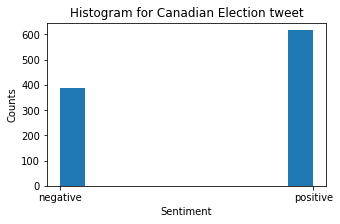

In [20]:
# A histogram showing the number of negative or positive sentiments.
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
plt.hist(df_elect['sentiment'])
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.xticks([0,1],['negative','positive'])
plt.title('Histogram for Canadian Election tweet')
#From this, you can see that there are more positive tweets than negative tweets.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb45cea6d50>,
      dtype=object)

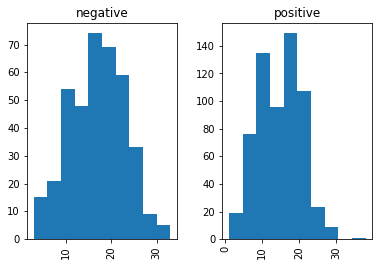

In [21]:
#Determine if the tweet length is correlated with the sentiment.
df_elect['length']=df_elect['token'].apply(len)
df_elect.hist('length',by='sentiment')
#The distributions of length for both positive and negative are similar but the positive sentimental tweet is more left skewed. 
#The negative sentiment tweet tends to have more words. 

Text(0.5, 1.0, 'Histogram for Canadian Election tweet counts for each party')

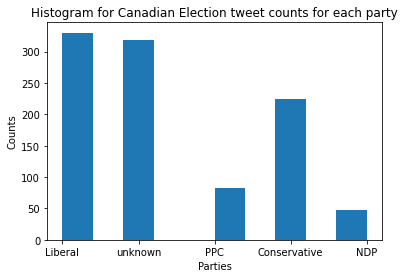

In [22]:
#Plot for the tweet counts for each party
plt.hist(df_elect['party'])
plt.ylabel('Counts')
plt.xlabel('Parties')
plt.xticks([0,1,2,3,4],['Liberal','unknown','PPC','Conservative','NDP'])
plt.title('Histogram for Canadian Election tweet counts for each party')

# The mojority tweets are about Liberal, and the second most tweets are about Conservative, Then PPC and NDP.

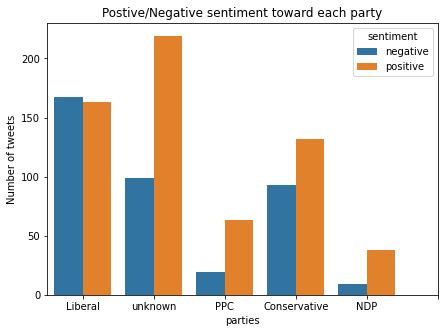

In [23]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.countplot(x='party', hue='sentiment', data=df_elect)
ax.set(xlabel='parties', ylabel='Number of tweets', title = "Postive/Negative sentiment toward each party")
plt.xticks([0,1,2,3,4,5],['Liberal','unknown','PPC','Conservative','NDP'])
plt.show()
#Almost half of the Liberal related tweets have the positive sentiment, and half of the Liberal related tweets are againt the Liberal.  
# PPC, Conservative and NDP has more positive sentiment tweets than the negative sentiment tweets. 

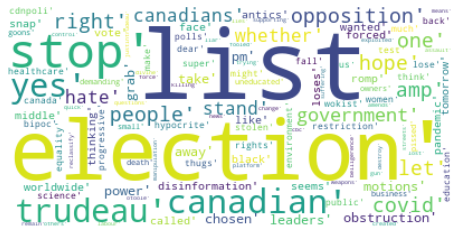

In [24]:
from wordcloud import WordCloud
wordcloud_elect = WordCloud(background_color="white").generate(str(df_elect["token"].ravel()))
plt.figure(figsize = (8,6))
plt.imshow(wordcloud_elect, interpolation='bilinear')
plt.axis("off")
plt.show()

2.2.2 sentiment_analysis.csv

Text(0.5, 1.0, 'Histogram for sentiment_analysis tweet')

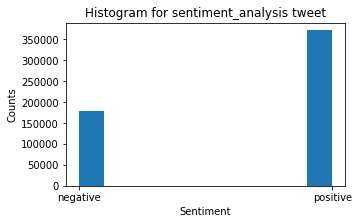

In [25]:
# A histogram showing the number of negative or positive sentiments.
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
plt.hist(df_sent['label'])
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.xticks([0,1],['negative','positive'])
plt.title('Histogram for sentiment_analysis tweet')
#From this, you can see that there are more positive tweets than negative tweets.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb45c3dee10>,
      dtype=object)

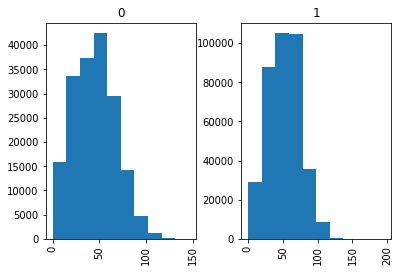

In [26]:
df_sent['length']=df_sent['token'].apply(len)
df_sent.hist('length',by='label')
#The distributions of length for both positive and negative are similar but the tail for positive tweets is a little heavier than for negative tweets.
#The sentiment and the length of the tweet is not correlated. 

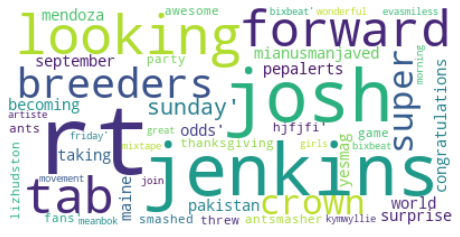

In [27]:
from wordcloud import WordCloud
wordcloud_sent = WordCloud(background_color="white").generate(str(df_sent["token"].ravel()))
plt.figure(figsize = (8,6))
plt.imshow(wordcloud_sent, interpolation='bilinear')
plt.axis("off")
plt.show()

#3. Model preparation

**3.1 Bag of Word**

In [28]:
#Obtain the bag of word matrix
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
words = df_sent['token'] #Convert the token column into bag of word matrix
vectorizer = CountVectorizer(max_features = 1000)
vector_model = vectorizer.fit(words)
X_BW= vector_model.transform(words)

In [29]:
from sklearn.model_selection import train_test_split
y = df_sent['label']
X_train_BW, X_test_BW, y_train_BW, y_test_BW = train_test_split(X_BW,y,test_size=0.3) 
#Split the data into 30% test set and 70% training set.

**3.2 TF-IDF**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
words = df_sent['token'] #Convert the token column into TF-IDF matrix
vectfidf = TfidfVectorizer(max_features = 1000)
vectfidf_model = vectfidf.fit(words)
X_TF = vectfidf_model.transform(words)

In [31]:
from sklearn.model_selection import train_test_split
y = df_sent['label']
X_train_TF, X_test_TF, y_train_TF, y_test_TF = train_test_split(X_TF,y,test_size=0.3) 
#Split the data into 30% test set and 70% training set.

#4. Model implementation and tuning

**4.1 Perform Bag of Words and TF-IDF on generic tweets**

**4.1.1 Bag of Word for generic tweets**

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_BW,y_train_BW)

from sklearn.metrics import accuracy_score
predictions1 = model1.predict(X_test_BW)
accuracy1 = accuracy_score(y_test_BW, predictions1)
print("test accuracy for logistic regression is: {}%".format(accuracy1*100))

test accuracy for logistic regression is: 94.23079252413426%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier(n_neighbors = 5)
model2=clf2.fit(X_test_BW, y_test_BW)
predictions2 = model2.predict(X_test_BW)
accuracy2 = accuracy_score(y_test_BW, predictions2)
print("testing accuracy for KNN is: {}%".format(accuracy2*100))

testing accuracy for KNN is: 93.05345268232415%


In [33]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB()
model3=clf3.fit(X_train_BW, y_train_BW)
predictions3 = model3.predict(X_test_BW)
accuracy3 = accuracy_score(y_test_BW, predictions3)
print("testing accuracy for Naive Bayes is: {}%".format(accuracy3*100))

testing accuracy for Naive Bayes is: 89.69403699172713%


In [34]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf4 = make_pipeline(StandardScaler(with_mean=False), LinearSVC())
model4=clf4.fit(X_train_BW, y_train_BW)
predictions4 = model4.predict(X_test_BW)
accuracy4 = accuracy_score(y_test_BW, predictions4)
print("testing accuracy for SVM is: {}%".format(accuracy4*100))

testing accuracy for SVM is: 92.91597524194817%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [51]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier
clf5 = DecisionTreeClassifier(random_state=0)
model5=clf5.fit(X_train_BW, y_train_BW)
predictions5 = model5.predict(X_test_BW)
accuracy5 = accuracy_score(y_test_BW, predictions5)
print("testing accuracy for Decision Trees is: {}%".format(accuracy5*100))

testing accuracy for Decision Trees is: 92.58590825954772%


In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf6 = RandomForestClassifier(max_depth=2, random_state=0)
model6=clf6.fit(X_train_BW, y_train_BW)
predictions6 = model6.predict(X_test_BW)
accuracy6 = accuracy_score(y_test_BW, predictions6)
print("testing accuracy for Random Forest is: {}%".format(accuracy6*100))

testing accuracy for Random Forest is: 67.58742232827433%


In [53]:
#XGBoost
import xgboost as xgb
clf7 = xgb.XGBClassifier()
model7 = clf7.fit(X_train_BW, y_train_BW)
predictions7 = model7.predict(X_test_BW)
accuracy7 = accuracy_score(y_test_BW, predictions7)
print("testing accuracy for XGBoost is: {}%".format(accuracy7*100))

testing accuracy for XGBoost is: 85.94520282464661%


**4.1.2 TF-IDF for generic tweets**

In [54]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
modela = LogisticRegression()
modela.fit(X_train_TF,y_train_TF)

from sklearn.metrics import accuracy_score
predictionsa = modela.predict(X_test_TF)
accuracya = accuracy_score(y_test_TF,predictionsa)
print("test accuracy for logistic regression is: {}%".format(accuracya*100))

test accuracy for logistic regression is: 94.15145532286002%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clfb = KNeighborsClassifier(n_neighbors = 5)
modelb=clfb.fit(X_test_TF, y_test_TF)
predictionsb = modelb.predict(X_test_TF)
accuracyb = accuracy_score(y_test_TF, predictionsb)
print("testing accuracy for KNN is: {}%".format(accuracyb*100))

testing accuracy for KNN is: 88.89279182160637%


In [56]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clfc = MultinomialNB()
modelc=clfc.fit(X_train_TF, y_train_TF)
predictionsc = modelc.predict(X_test_TF)
accuracyc = accuracy_score(y_test_TF, predictionsc)
print("testing accuracy for Naive Bayes is: {}%".format(accuracyc*100))

testing accuracy for Naive Bayes is: 88.75470875373975%


In [58]:
#SVM
from sklearn import svm
clfd = make_pipeline(StandardScaler(with_mean=False), LinearSVC())
modeld=clfd.fit(X_train_TF, y_train_TF)
predictionsd = modeld.predict(X_test_TF)
accuracyd = accuracy_score(y_test_TF, predictionsd)
print("testing accuracy for SVM is: {}%".format(accuracyd*100))

testing accuracy for SVM is: 92.35455855812206%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [59]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier
clfe = DecisionTreeClassifier(random_state=0)
modele=clfe.fit(X_train_TF, y_train_TF)
predictionse = modele.predict(X_test_TF)
accuracye = accuracy_score(y_test_TF, predictionse)
print("testing accuracy for Decision Trees is: {}%".format(accuracye*100))

testing accuracy for Decision Trees is: 92.85238435543066%


In [60]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clff = RandomForestClassifier(max_depth=2, random_state=0)
modelf=clff.fit(X_train_TF, y_train_TF)
predictionsf = modelf.predict(X_test_TF)
accuracyf = accuracy_score(y_test_TF, predictionsf)
print("testing accuracy for Random Forest is: {}%".format(accuracyf*100))

testing accuracy for Random Forest is: 67.4057340810814%


In [61]:
#XGBoost
import xgboost as xgb
clfg = xgb.XGBClassifier()
modelg = clfg.fit(X_train_TF, y_train_TF)
predictionsg = modelg.predict(X_test_TF)
accuracyg = accuracy_score(y_test_TF, predictionsg)
print("testing accuracy for XGBoost is: {}%".format(accuracyg*100))

testing accuracy for XGBoost is: 86.2250027253237%


**4.1.3 Comparison of seven algorithms and two type of features**

In [71]:
#Show all the test accuracies in a table

method=[['Logistic Regression'],['KNN'],['Naive Bayes'],['SVM'],['Decision trees'],['Random Forest'],['XGBoost']]
bow=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]
tfidf=[accuracya,accuracyb,accuracyc,accuracyd,accuracye,accuracyf,accuracyg]

df_accuracy=pd.DataFrame(data=method, columns=['Algorithm'])
df_accuracy['Bag of Word']=bow
df_accuracy['TF-IDF']=tfidf
df_accuracy

,Algorithm,Bag of Word,TF-IDF
0,Logistic Regression,0.941896,0.941515
1,KNN,0.930535,0.888928
2,Naive Bayes,0.897061,0.887547
3,SVM,0.929796,0.923546
4,Decision trees,0.925859,0.928524
5,Random Forest,0.675874,0.674057
6,XGBoost,0.859452,0.862250


Therefore, among the seven classification algorithms, Logistic Regression using bag of words method has the highest accuacy. Except Random Forest algorithm, all other algorithms for both bag of words and TF-IDF method have resonable high accuracies. None of the algorithms is overfitting, only decision trees algorith is underfitting. 

**4.1.4 Logistic Regression with Bag of Words on Election Data**

In [33]:
for i in range(df_elect.shape[0]):
    df_elect.at[i, 'token']=' '.join(df_elect.iloc[i]['token'])

In [34]:
#Obtain the bag of word matrix
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
words_elect = df_elect['token'] #Convert the token column into bag of word matrix
vectorizer = CountVectorizer(max_features = 1000)
vector_model_elect = vectorizer.fit(words_elect)
X_elect= vector_model_elect.transform(words_elect)

In [35]:
from sklearn.model_selection import train_test_split
y_elect = df_elect['sentiment']
X_train_elect, X_test_elect, y_train_elect, y_test_elect = train_test_split(X_elect,y_elect,test_size=0.3) 
#Split the data into 30% test set and 70% training set.

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_elect = LogisticRegression()
model_elect.fit(X_train_elect,y_train_elect)

from sklearn.metrics import accuracy_score
predictions_elect = model_elect.predict(X_test_elect)
accuracy_elect = accuracy_score(y_test_elect, predictions_elect)
print("test accuracy for logistic regression is: {}%".format(accuracy_elect*100))

test accuracy for logistic regression is: 77.74086378737542%


The accuracy for the election data is around 75%, which is not quite ideal. 

**4.1.5 Other two metrics evaluating the model**

In [37]:
#Method 1: Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test_BW,predictions1))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     53516
           1       0.97      0.95      0.96    111602

    accuracy                           0.94    165118
   macro avg       0.93      0.94      0.93    165118
weighted avg       0.94      0.94      0.94    165118



In [38]:
#Method2: Confusion matrix
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test_BW,predictions1))

[[ 49783   3733]
 [  5793 105809]]


By analyzing the confusion matrix and classification report, the f1 score for predicting negative is 0.91 and positive is 0.96. It is more accurate when predicting positive sentiment. 

**4.1.6 Visualization**

In [39]:
from sklearn.linear_model import LogisticRegression
model_best = LogisticRegression()
model_best.fit(X_elect,y_elect)

from sklearn.metrics import accuracy_score
prediction_best = model_best.predict(X_elect)
df_elect['prediction']=prediction_best

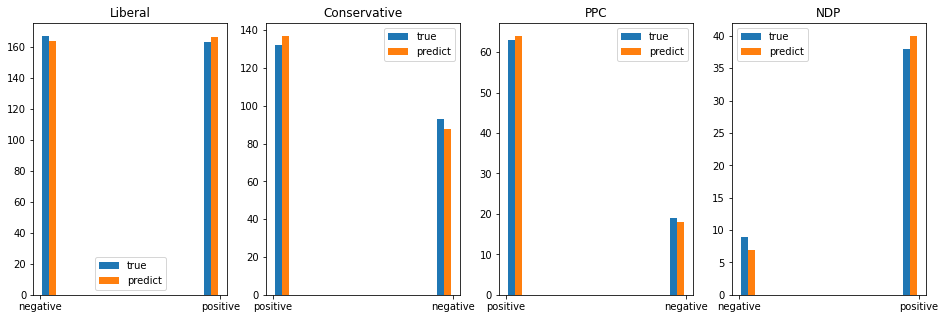

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.subplot(1, 4, 1)
df_liberal=df_elect[df_elect.party=='Liberal']
x = df_liberal['sentiment']
y = df_liberal['prediction']
lib=plt.hist([x, y], label=['true', 'predict'])
plt.title('Liberal')
plt.legend()

plt.subplot(1, 4, 2)
df_Conserve=df_elect[df_elect.party=='Conservative']
x = df_Conserve['sentiment']
y = df_Conserve['prediction']
con=plt.hist([x, y], label=['true', 'predict'])
plt.title('Conservative')
plt.legend()

plt.subplot(1, 4, 3)
df_PPC=df_elect[df_elect.party=='PPC']
x = df_PPC['sentiment']
y = df_PPC['prediction']
ppc=plt.hist([x, y], label=['true', 'predict'])
plt.title('PPC')
plt.legend()

plt.subplot(1, 4, 4)
df_NDP=df_elect[df_elect.party=='NDP']
x = df_NDP['sentiment']
y = df_NDP['prediction']
ndp=plt.hist([x, y], label=['true', 'predict'])
plt.title('NDP')
plt.legend()

plt.show()

Fro the plots above, we can see that the predications are very similar to the true sentiment. Therefore,   tweets  is 
useful for political parties during election campaigns. 

PPC and NDP have less tweets, but higher supporting rates. Half of the tweets supports Liberal and another half against the Liberal. Conservative have slightly more supporters than oppositions.

In order to increase the accuracy, we can involve more key words to determine the parties. Also, the dataset is imbalanced, which may cause bias.

**4.2 Negative Reason Prediction**

**4.2.1 Obtain the accuray based on the Logistic Regression with Bag of  Word for negative reason** 

In [41]:
#Preperation: Obtain the bag of words matrix and split the data 

df_neg=df_elect[df_elect.sentiment=='negative']

#Obtain the bag of word matrix
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
words_neg = df_neg['token'] #Convert the token column into bag of word matrix
vectorizer = CountVectorizer(max_features = 1000)
vector_model = vectorizer.fit(words_neg)
X_neg= vector_model.transform(words_neg)

#Split the data into 30% test set and 70% training set.
from sklearn.model_selection import train_test_split
y_neg = df_neg['negative_reason']
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg,y_neg,test_size=0.3) 

In [42]:
model_neg = LogisticRegression()    
model_neg.fit(X_train_neg, y_train_neg)
predictions_neg = model_neg.predict(X_test_neg)
accuracy = accuracy_score(y_test_neg, predictions_neg)
print ("This model got an accuracy of {}% on the testing set".format(round(accuracy*100,2)))   

This model got an accuracy of 51.28% on the testing set


It is not a good model predicting the negative reason. Since there are too many categoricals for the negative reason. 

One way can imporve the accuracy is to reduce the level of targets by combining the similar negative reasons togther. 

**4.2.2 Hyperparameter Tuning**

In [43]:
logistic=LogisticRegression()
print(logistic.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [44]:
X_train_neg=X_train_neg.toarray()
df_X_train_neg=pd.DataFrame(data=X_train_neg)
df_y_train_neg=pd.DataFrame(data=y_train_neg)

In [45]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [47]:
#hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_neg)

best_params = {}
best_accuracy = 0

for C in [0.001,0.01,0.05,0.1,0.5]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        accuracy_list = []
        fold_count = 0
        model = LogisticRegression(solver = solver, C = C)
        for train_idx, test_idx in kfold.split(X_train_neg):
            X_train, X_test = df_X_train_neg.values[train_idx], df_X_train_neg.values[test_idx]
            y_train, y_test = df_y_train_neg.values[train_idx], df_y_train_neg.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test,predictions)
            accuracy_list.append(accuracy)
            fold_count += 1
            
        if np.mean(accuracy_list) > best_accuracy:
            best_params = {'C':C, "solver": solver}
            best_accuracy = np.mean(accuracy_list)

print(best_params)
print("Best Accuracy: {}%".format(round(best_accuracy*100,3)))

{'C': 0.01, 'solver': 'newton-cg'}
Best Accuracy: 44.815%


Therefore, the optimal hyperparameters for C is 0.001, and the best solver is liblinear. 

**4.2.3 Combining the similar negative reasons and repredict**

In [91]:
df_y_test_neg=pd.DataFrame(data=y_test_neg,columns=['negative_reason'])
df_y_test_neg['negative_reason'].unique()

array(['others', 'tell lies', 'scandal', 'gun control',
       'calling election early', 'economy', 'covid ',
       'women reproductive right and racism', 'climate problem'],
      dtype=object)

Text(0.5, 1.0, 'Histogram for Negative Reason')

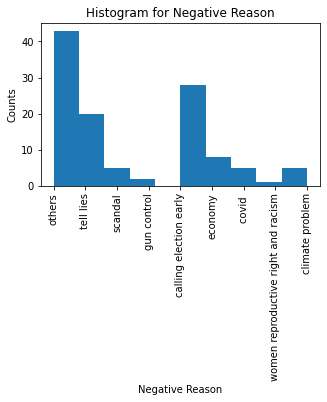

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
plt.hist(df_y_test_neg['negative_reason'])
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Negative Reason')
plt.title('Histogram for Negative Reason')

Therefore, the most frequent negative reason is calling election early and tell lies. Since the rest reasons have too little frequencies, we will combine them with 'Others'. 

In [94]:
df_y_test_neg["negative_reason"].replace({"scandal": "others", "gun control": "others","economy":"others",
                                          "covid":"others","women reproductive right and racism":"others","climate problem":"others"}, inplace=True)
df_y_train_neg["negative_reason"].replace({"scandal": "others", "gun control": "others","economy":"others",
                                          "covid":"others","women reproductive right and racism":"others","climate problem":"others"}, inplace=True)

In [96]:
model_neg = LogisticRegression()    
model_neg.fit(X_train_neg, df_y_train_neg)
predictions_neg = model_neg.predict(X_test_neg)
accuracy = accuracy_score(df_y_test_neg, predictions_neg)
print ("This model got an accuracy of {}% on the testing set".format(round(accuracy*100,2)))   

This model got an accuracy of 63.25% on the testing set


By reducing the number of catergories in the negative reason, the accuracy increaded by approximately 10%. 

**4.3 Rank the importance of non-stop words**

In [104]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_elect = LogisticRegression()
model_elect.fit(X_train_elect,y_train_elect)

from sklearn.metrics import accuracy_score
predictions_elect = model_elect.predict(X_test_elect)
accuracy_elect = accuracy_score(y_test_elect, predictions_elect)
print("test accuracy for logistic regression is: {}%".format(accuracy_elect*100))

test accuracy for logistic regression is: 77.74086378737542%


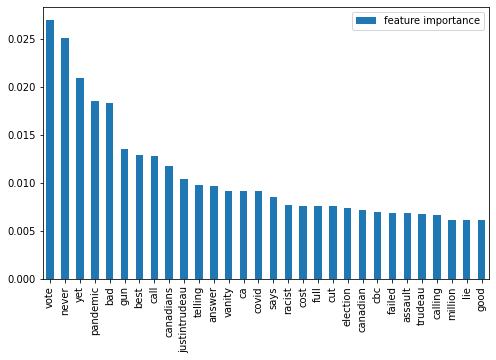

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# ordinal encode target variable
label_encoder = LabelEncoder()
y_train_elect_encoded = label_encoder.fit_transform(y_train_elect)
df_y_encode=pd.DataFrame(data=y_train_elect_encoded)
ordinal = OrdinalEncoder()

# fit the model
model_electRF = RandomForestRegressor()
model_electRF.fit(X_train_elect, df_y_encode)
df_feature_importance = pd.DataFrame(model_electRF.feature_importances_, 
                                     index=vector_model_elect.get_feature_names(), 
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.iloc[0:30,:].plot(kind='bar', figsize=(8,5))

In [113]:
df_feature_importance.iloc[0:50,:]

,feature importance
vote,0.026949
never,0.025101
yet,0.020868
pandemic,0.018486
bad,0.018337
gun,0.013565
best,0.012847
call,0.012744
canadians,0.011751
justintrudeau,0.010411


Therefore, the most important word is vote, never, yet, pandemic, bad, gun, best, call...